# Section 1.1: Load, clean, and show statistics of datasets

In [ ]:
import pandas as pd
from scipy.io import arff
from scipy.spatial import distance
import sklearn
import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.debugger import set_trace
np.random.seed(1234)

#### Load datasets

In [ ]:
# Hepatitis dataset
col_names_1 = ["CLASS", "AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]
categorical_cols_1 = ["CLASS", "SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","HISTOLOGY"]
continuous_cols_1 = ["AGE","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME"]

df_1 = pd.read_csv("hepatitis.data", names=col_names_1, header=None)
# Remove rows containing "?" as a value 
df_1 = df_1[~df_1.eq('?').any(1)]
# Convert to floats
df_1 = df_1.applymap(float)

# Make class labels 0 and 1 instead of 1 and 2
df_1["CLASS"] = df_1["CLASS"].apply(lambda x: x - 1)

df_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 5 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CLASS            80 non-null     float64
 1   AGE              80 non-null     float64
 2   SEX              80 non-null     float64
 3   STEROID          80 non-null     float64
 4   ANTIVIRALS       80 non-null     float64
 5   FATIGUE          80 non-null     float64
 6   MALAISE          80 non-null     float64
 7   ANOREXIA         80 non-null     float64
 8   LIVER BIG        80 non-null     float64
 9   LIVER FIRM       80 non-null     float64
 10  SPLEEN PALPABLE  80 non-null     float64
 11  SPIDERS          80 non-null     float64
 12  ASCITES          80 non-null     float64
 13  VARICES          80 non-null     float64
 14  BILIRUBIN        80 non-null     float64
 15  ALK PHOSPHATE    80 non-null     float64
 16  SGOT             80 non-null     float64
 17  ALBUMIN          

In [ ]:
df_1.describe()

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,0.837500,40.66250,1.137500,1.525000,1.737500,1.350000,1.612500,1.850000,1.837500,1.525000,1.812500,1.687500,1.850000,1.875000,1.221250,102.912500,82.025000,3.843750,62.512500,1.41250
std,0.371236,11.28003,0.346547,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684779,71.599974,0.576292,23.427774,0.49539
min,0.000000,20.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.00000
25%,1.000000,32.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,68.250000,30.750000,3.500000,46.000000,1.00000
50%,1.000000,38.50000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,56.500000,4.000000,62.000000,1.00000
75%,1.000000,49.25000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.300000,133.500000,102.750000,4.200000,77.250000,2.00000
max,1.000000,72.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.800000,280.000000,420.000000,5.000000,100.000000,2.00000


In [ ]:
df_1.head(5)

,CLASS,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
5,1.0,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.0,28.0,4.0,75.0,1.0
10,1.0,39.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.3,78.0,30.0,4.4,85.0,1.0
11,1.0,32.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1.0
12,1.0,41.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,81.0,60.0,3.9,52.0,1.0
13,1.0,30.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.2,57.0,144.0,4.9,78.0,1.0


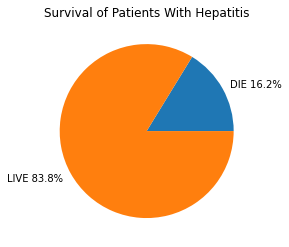

In [ ]:
num_live = df_1["CLASS"].sum()
num_die = df_1.shape[0] - num_live
hepatitis_labels = [f"DIE {round((num_die/df_1.shape[0])*100, 1)}%", f"LIVE {round((num_live/df_1.shape[0])*100, 1)}%"]
diabetes_data = [num_die, num_live]
plt.pie(diabetes_data, labels=hepatitis_labels)
plt.title("Survival of Patients With Hepatitis")
plt.savefig('Hepatitis_distribution.png',dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
df_1.shape[0]

80

In [ ]:
# DR (diabetic retinopathy dataset)
data = arff.loadarff('messidor_features.arff')
df_2 = pd.DataFrame(data[0])
# convert to floats
df_2.applymap(float)

# Check that binary features are indeed binary
for col in ["0", "1", "18"]:
    df_2 = df_2[ (df_2[col] == 1.0) | (df_2[col] == 0.0) ]
# Convert label from binary to float
df_2["Class"] = df_2["Class"].astype(float)
# Exclude data points labeled as bad quality assesments
df_2 = df_2[df_2["0"] != 0]
df_2.drop(labels="0", axis=1, inplace=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1147 entries, 0 to 1150
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1147 non-null   float64
 1   2       1147 non-null   float64
 2   3       1147 non-null   float64
 3   4       1147 non-null   float64
 4   5       1147 non-null   float64
 5   6       1147 non-null   float64
 6   7       1147 non-null   float64
 7   8       1147 non-null   float64
 8   9       1147 non-null   float64
 9   10      1147 non-null   float64
 10  11      1147 non-null   float64
 11  12      1147 non-null   float64
 12  13      1147 non-null   float64
 13  14      1147 non-null   float64
 14  15      1147 non-null   float64
 15  16      1147 non-null   float64
 16  17      1147 non-null   float64
 17  18      1147 non-null   float64
 18  Class   1147 non-null   float64
dtypes: float64(19)
memory usage: 179.2 KB


In [ ]:
df_2.head(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,0.0
1,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,0.0
2,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,1.0
3,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,0.0
4,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,1.0


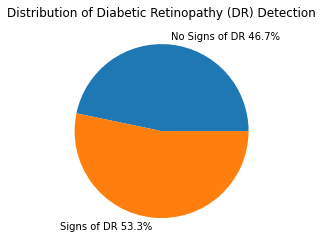

In [ ]:
num_1 = df_2["Class"].sum() # label 1 = signs of DR
num_0 = df_2.shape[0] - num_1 # label 0 = no signs of DR
hepatitis_labels = [f"No Signs of DR {round((num_0/df_2.shape[0])*100, 1)}%", f"Signs of DR {round((num_1/df_2.shape[0])*100, 1)}%"]
diabetes_data = [num_0, num_1]
plt.pie(diabetes_data, labels=hepatitis_labels)
plt.title("Distribution of Diabetic Retinopathy (DR) Detection")
plt.savefig('DR_distribution.png',dpi=300,bbox_inches='tight')
plt.show()

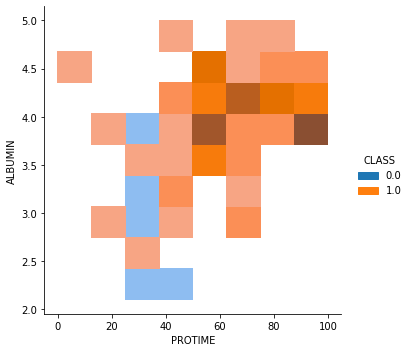

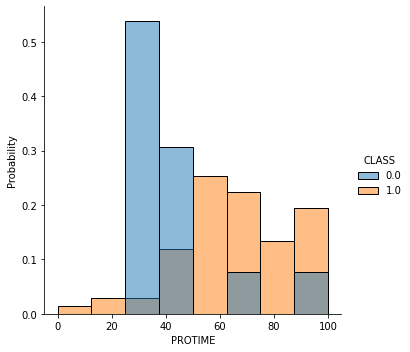

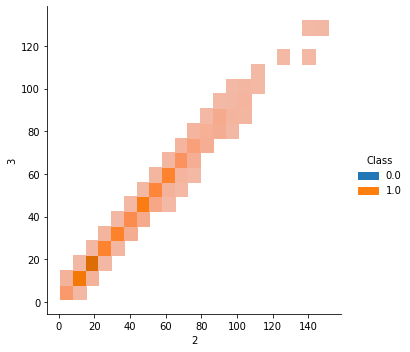

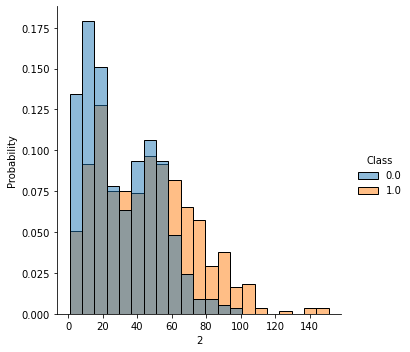

In [ ]:
import seaborn as sns

sns.displot(df_1, x="PROTIME", y="ALBUMIN", hue="CLASS")
sns.displot(df_1, x="PROTIME", hue="CLASS", stat="probability", common_norm=False)
sns.displot(df_2, x="2", y="3", hue="Class")
sns.displot(df_2, x="2", hue="Class", stat="probability", common_norm=False)
x1=df_2.iloc[:,2:]
y1=df_2[['Class']]
x1=np.array(x1)
y1=np.array(y1)

x2=df_2.iloc[:,:2]
y2=df_2[['Class']]
x2=np.array(x2)
y2=np.array(y2)

(num_instances, num_features), num_classes = x2.shape, np.max(y2)+1
inds = np.random.permutation(num_instances)


# 1.2 Find best 2 features based on correlation

In [ ]:
categorical_corrs_1 = df_1[categorical_cols_1].corr()["CLASS"]
# Get 2 features with highest correlation with CLASS
categorical_corrs_1.abs().sort_values()[-3:-1] # Note: [-1] is just CLASS

# Uncomment line below to see full correlation table
# df_1[categorical_cols_1].corr().abs()

HISTOLOGY    0.456856
ASCITES      0.479211
Name: CLASS, dtype: float64

In [ ]:
continuous_corrs_1 = df_1[continuous_cols_1 + ["CLASS"]].corr()["CLASS"]
# Get 2 features with highest correlation with CLASS
continuous_corrs_1.abs().sort_values()[-3:-1] # Note: [-1] is just CLASS

# Uncomment line below to see full correlation table for continuous data
# df_1[continuous_cols_1 + ["CLASS"]].corr()

PROTIME    0.395386
ALBUMIN    0.477404
Name: CLASS, dtype: float64

In [ ]:
# find 2 highest correlated features of DR dataset
df_2.corr()["Class"].abs().sort_values()[-3:-1]
# Highest correlations are columns 2 and 3

# Uncomment line below to see full correlation table
# df_2.corr()

3    0.264829
2    0.291177
Name: Class, dtype: float64

# Section 2.1: Define KNN Model

In [ ]:
# Define Model

euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)

class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        # calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        # self.x is in shape (100, 2), x_test is in shape (50, 2)
        # self.x[None, :, :] is in shape (1, 100, 2), and x_test[:,None,:] is in shape (50, 1, 2)
        # result: (x_test.shape[0], self.x.shape[0])
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((int(num_test), int(self.K)), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        # return num_test, knns
        for i in range(num_test):
            # print(i)
            knns[i,:] = np.argsort(distances[i])[:self.K]
            # get k closest training samples, reshape points into a vector of ints
            closest_points = self.y[knns[i,:]]
            y_prob[i,:] = np.bincount(closest_points, minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

# Section 2.2 Select Data, Run KNN

Select Dataset 1 or 2 by adjusting commenting

In [ ]:
# split data for either dataset


# # Uncomment below to run for Hepatitis dataset
columns = list(df_1.columns)
columns.remove("CLASS")
X = df_1[columns].to_numpy()
X = df_1[["PROTIME", "ALBUMIN"]].to_numpy()
y = df_1[["CLASS"]].to_numpy().flatten().astype(int)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.4, random_state=3, shuffle=True)
dataset_name = "hepatitis dataset"


#Uncomment to run for Diabetes dataset
X2 = df_2[["2", "3"]].to_numpy()
y2 = df_2[["Class"]].to_numpy().flatten().astype(int)
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y2, test_size = 0.4, random_state=3, shuffle=True)
dataset_name = "diabetic retinopathy dataset"

X_val, X_test, y_val, y_test = model_selection.train_test_split(X_test, y_test, test_size = 0.5, random_state=3, shuffle=True)
X2_val, X2_test, y2_val, y2_test = model_selection.train_test_split(X2_test, y2_test, test_size = 0.5, random_state=3, shuffle=True)
#print the feature shape and classes of dataset 
(N,D), C = X.shape, len(np.unique(y1))
(N2,D2), C2 = X2.shape, len(np.unique(y2))

print(f'instances (N) \t {N} \nfeatures (D) \t {D} \nclasses (C) \t {C}')
print(f'instances (N2) \t {N2} \nfeatures (D2) \t {D2} \nclasses (C2) \t {C2}')

instances (N) 	 80 
features (D) 	 2 
classes (C) 	 2
instances (N2) 	 1147 
features (D2) 	 2 
classes (C2) 	 2


Find best K Value and Evaluate Model

In [ ]:
# Find best k and evaluate model

def hepatitis_find_best_k(dist_fun, dist_string):

# Required function to evaluate accuracy of model
    def evaluate_acc(y_pred, y_actual):
        return np.sum(y_pred == y_actual)/y_pred.shape[0]

    model_choices=[]
    valid_acc = []
    train_acc = []
    test_acc = []

    for k in range(1,30,2):


        knn = KNN(K=k, dist_fn=dist_fun) # create a KNN object (OOP)
        y_prob,_ = knn.fit(X_train.astype(int), y_train.astype(int)).predict(X_train)
        y_pred = np.argmax(y_prob, axis=-1)
        accuracy = evaluate_acc(y_pred, y_train)
        train_acc.append(accuracy)

        knn = KNN(K=k, dist_fn=dist_fun) # create a KNN object (OOP)
        y_prob,_ = knn.fit(X_train.astype(int), y_train.astype(int)).predict(X_val)
        y_pred = np.argmax(y_prob, axis=-1)
        accuracy = evaluate_acc(y_pred, y_val)
        valid_acc.append(accuracy)

        knn = KNN(K=k, dist_fn=dist_fun) # create a KNN object (OOP)
        y_prob,_ = knn.fit(X_train.astype(int), y_train.astype(int)).predict(X_test)
        y_pred = np.argmax(y_prob, axis=-1)
        accuracy = evaluate_acc(y_pred, y_test)
        test_acc.append(accuracy)

        model_choices.append(k)

    best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
    knn = KNN(K=best_valid_K, dist_fn=dist_fun) # create a KNN object (OOP)
    y_prob,_ = knn.fit(X_train.astype(int), y_train.astype(int)).predict(X_test)
    y_pred = np.argmax(y_prob, axis=-1)
    accuracy = evaluate_acc(y_pred, y_test)

    # print(valid_acc)
    print(f'Hepatitis Dataset\n\tDistance Function: {dist_string}\n\tbest K based on validation data = {best_valid_K}\n\ttest accuracy = {accuracy*100:.1f}%')



    plt.plot(model_choices, test_acc, marker='*', color='red', label='testing')
    plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
    plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    # plt.title("K Selection for Hepatitis Dataset")
    plt.legend(loc='best')
    plt.savefig('Hepatitis_KNN_chooseK.png',dpi=300,bbox_inches='tight')



Hepatitis Dataset
	Distance Function: Euclidean
	best K based on validation data = 15
	test accuracy = 81.2%


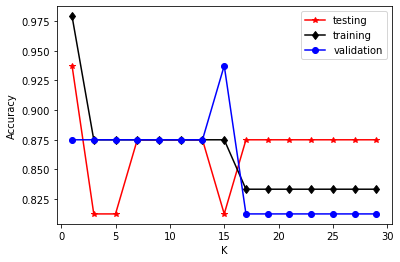

In [ ]:
hepatitis_find_best_k(euclidean, "Euclidean")

Hepatitis Dataset
	Distance Function: Manhattan
	best K based on validation data = 15
	test accuracy = 87.5%


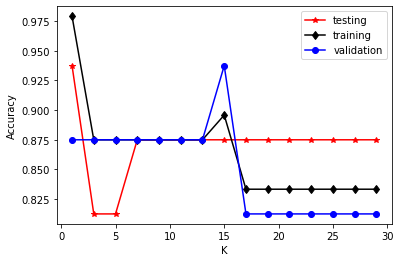

In [ ]:
hepatitis_find_best_k(manhattan, "Manhattan")

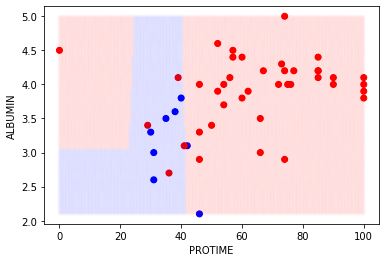

In [ ]:
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 200)
x1v = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 200)

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T


k = 15

knn = KNN(K=k, dist_fn = manhattan)
knn.fit(x=X_train, y=y_train)
y_prob, _ = knn.predict(X_test)
y_pred = np.argmax(y_prob, axis=-1)


knn = KNN(K=k, dist_fn = manhattan)
knn.fit(x=X_train, y=y_train)
y_prob_all, _ = knn.predict(x_all)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all = np.argmax(y_prob_all, axis=-1)

plt.clf()
c_train = ['r' if yy==1 else 'b' for yy in y_train]
plt.scatter(X_train[:,0], X_train[:,1], c=c_train, marker='o', alpha=1)
#     plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
#     plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
#     plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, marker='s')
#     plt.savefig('prediction_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight')
c_boundaries=['r' if yy==1 else 'b' for yy in y_pred_all]
plt.scatter(x_all[:,0], x_all[:,1], c=c_boundaries, marker='.', alpha=0.01)
plt.ylabel('ALBUMIN')
plt.xlabel('PROTIME')
# plt.title('Decision Boundaries for Hepatitis Dataset with K = ' + str(k))
plt.savefig('Hepatitis_decision_boundaries_KNN_'+str(k)+'.png', dpi=300, bbox_inches='tight') 
plt.show()


In [ ]:
def diabetes_find_best_k(dist_fun, dist_string):

# Find best k and evaluate model

# Required function to evaluate accuracy of model
    def evaluate_acc(y_pred, y_actual):
        return np.sum(y_pred == y_actual)/y_pred.shape[0]


    model_choices=[]
    valid_acc = []
    train_acc = []
    test_acc = []

    for k in range(1,100,2):
        knn = KNN(K=k, dist_fn=manhattan) # create a KNN object (OOP)
        y2_prob,_ = knn.fit(X2_train.astype(int), y2_train.astype(int)).predict(X2_train)
        y2_pred = np.argmax(y2_prob, axis=-1)
        accuracy = evaluate_acc(y2_pred, y2_train)
        train_acc.append(accuracy)

        knn = KNN(K=k, dist_fn=dist_fun) # create a KNN object (OOP)
        y2_prob,_ = knn.fit(X2_train.astype(int), y2_train.astype(int)).predict(X2_val)
        y2_pred = np.argmax(y2_prob, axis=-1)
        accuracy = evaluate_acc(y2_pred, y2_val)
        valid_acc.append(accuracy)

        knn = KNN(K=k, dist_fn=manhattan) # create a KNN object (OOP)
        y2_prob,_ = knn.fit(X2_train.astype(int), y2_train.astype(int)).predict(X2_test)
        y2_pred = np.argmax(y2_prob, axis=-1)
        accuracy = evaluate_acc(y2_pred, y2_test)
        test_acc.append(accuracy)

        model_choices.append(k)

    best_valid_K = model_choices[valid_acc.index(max(valid_acc))]
    knn = KNN(K=best_valid_K, dist_fn = dist_fun)
    y2_prob,_ = knn.fit(X2_train.astype(int), y2_train.astype(int)).predict(X2_test)
    y2_pred = np.argmax(y2_prob, axis=-1)
    accuracy = evaluate_acc(y2_pred, y2_test)
    print(f'Diabetes Dataset\n\tDistance Function: {dist_string}\n\tBest K based on validation data = {best_valid_K}\n\tTest Accuracy = {accuracy*100:.1f}%')


    plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
    plt.plot(model_choices, test_acc, marker='s', color='red', label='testing')
    plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    # plt.title("K Selection for Diabetes")
    plt.legend(loc='best')
    plt.savefig('DR_KNN_chooseK.png',dpi=300,bbox_inches='tight')

Diabetes Dataset
	Distance Function: Euclidean
	Best K based on validation data = 5
	Test Accuracy = 62.2%


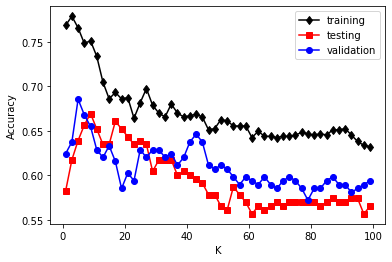

In [ ]:
diabetes_find_best_k(euclidean, "Euclidean")

Diabetes Dataset
	Distance Function: Manhattan
	Best K based on validation data = 7
	Test Accuracy = 65.7%


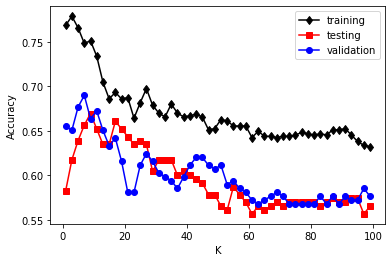

In [ ]:
diabetes_find_best_k(manhattan, "Manhattan")

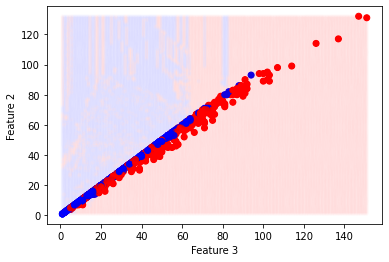

In [ ]:
#we can make the grid finer by increasing the number of samples from 200 to higher value
x0v = np.linspace(np.min(X2[:,0]), np.max(X2[:,0]), 200)
x1v = np.linspace(np.min(X2[:,1]), np.max(X2[:,1]), 200)

# to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

k = 7

knn = KNN(K=k, dist_fn = manhattan)
knn.fit(x=X2_train, y=y2_train)
y_prob, _ = knn.predict(X2_test)
y_pred = np.argmax(y_prob, axis=-1)


knn = KNN(K=k, dist_fn = manhattan)
knn.fit(x=X2_train, y=y2_train)
y_prob_all, _ = knn.predict(x_all)
y_pred_all = np.zeros_like(y_prob_all)
y_pred_all = np.argmax(y_prob_all, axis=-1)

plt.clf()
c_train = ['r' if yy==1 else 'b' for yy in y2_train]
plt.scatter(X2_train[:,0], X2_train[:,1], c=c_train, marker='o', alpha=1)
#     plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
#     plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
#     plt.scatter(x_test[:,0], x_test[:,1], c=y_pred, marker='s')
#     plt.savefig('prediction_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight')
c_boundaries=['r' if yy==1 else 'b' for yy in y_pred_all]
plt.scatter(x_all[:,0], x_all[:,1], c=c_boundaries, marker='.', alpha=0.01)
# plt.title('Decision Boundaries for Diabetes Dataset with K = ' + str(k))
plt.ylabel('Feature 2')
plt.xlabel('Feature 3')
plt.savefig('DR_decision_boundaries_KNN'+str(k)+'.png', dpi=300, bbox_inches='tight') 
plt.show()

# Section 3.1 Define Decision Tree Model

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

In [ ]:
def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log2(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

In [ ]:
class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        self.data = data
        self.labels = labels
        if self.num_classes is None:
            self.num_classes = np.max(labels) + 1
        #below are initialization of the root of the decision tree
        self.root = Node(np.arange(data.shape[0]), None)
        self.root.data = data
        self.root.labels = labels
        self.root.num_classes = self.num_classes
        self.root.depth = 0
        #to recursively build the rest of the tree
        self._fit_tree(self.root)
        return self

    def _fit_tree(self, node):
        #This gives the condition for termination of the recursion resulting in a leaf node
        if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
            return
        #greedily select the best test by minimizing the cost
        cost, split_feature, split_value = greedy_test(node, self.cost_fn)
        #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
        if np.isinf(cost):
            return
        #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
        #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
        test = node.data[node.data_indices,split_feature] <= split_value
        #store the split feature and value of the node
        node.split_feature = split_feature
        node.split_value = split_value
        #define new nodes which are going to be the left and right child of the present node
        left = Node(node.data_indices[test], node)
        right = Node(node.data_indices[np.logical_not(test)], node)
        #recursive call to the _fit_tree()
        self._fit_tree(left)
        self._fit_tree(right)
        #assign the left and right child to present child
        node.left = left
        node.right = right

    def predict(self, data_test):
        class_probs = np.zeros((data_test.shape[0], self.num_classes))
        for n, x in enumerate(data_test):
            node = self.root
            #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
            while node.left:
                if x[node.split_feature] <= node.split_value:
                    node = node.left
                else:
                    node = node.right
            #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
            class_probs[n,:] = node.class_prob
        return class_probs

# Section 3.2 Select Data, Run Decision Tree

Select Dataset 1 or 2 by adjusting commenting

In [ ]:
# split data for either dataset

# # Uncomment below to run for diabetes dataset
columns = list(df_1.columns)
columns.remove("CLASS")
X = df_1[columns].to_numpy()
X = df_1[["PROTIME", "ALBUMIN"]].to_numpy()
y = df_1[["CLASS"]].to_numpy().flatten().astype(int)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.4, random_state=3, shuffle=True)
dataset_name_1 = "hepatitis dataset"


#Uncomment to run for messidor dataset
X2 = df_2[["2", "3"]].to_numpy()
y2 = df_2[["Class"]].to_numpy().flatten().astype(int)
X2_train, X2_test, y2_train, y2_test = model_selection.train_test_split(X2, y2, test_size = 0.4, random_state=3, shuffle=True)
dataset_name_2 = "diabetic retinopathy dataset"

X_val, X_test, y_val, y_test = model_selection.train_test_split(X_test, y_test, test_size = 0.5, random_state=3, shuffle=True)
X2_val, X2_test, y2_val, y2_test = model_selection.train_test_split(X2_test, y2_test, test_size = 0.5, random_state=3, shuffle=True)
#print the feature shape and classes of dataset 
(N,D), C = X_train.shape, len(np.unique(y1))
(N2,D2), C2 = X2_train.shape, len(np.unique(y2))

print(f'instances (N) \t {N} \nfeatures (D) \t {D} \nclasses (C) \t {C}')
print(f'instances (N2) \t {N2} \nfeatures (D2) \t {D2} \nclasses (C2) \t {C2}')

instances (N) 	 48 
features (D) 	 2 
classes (C) 	 2
instances (N2) 	 688 
features (D2) 	 2 
classes (C2) 	 2


In [ ]:
def run_hepatitis_tree_depth(cost_fun, cost_string):
    # Required function to evaluate accuracy of model
    def evaluate_acc(y_pred, y_actual):
        return np.sum(y_pred == y_actual)/y_test.shape[0]

    model_choices=[]
    valid_acc = []
    train_acc = []
    test_acc = []

    n_train = y_train.shape[0]
    n_valid = y_val.shape[0]

    for depth in range(1,30):
        tree = DecisionTree(max_depth=depth, cost_fn = cost_fun)

        probs_test = tree.fit(X_train, y_train).predict(X_train)
        y_pred = np.argmax(probs_test,1)
        train_accuracy = np.sum(y_pred == y_train)/y_train.shape[0]

        probs_test = tree.fit(X_train, y_train).predict(X_val)
        y_pred = np.argmax(probs_test,1)
        val_accuracy = np.sum(y_pred == y_val)/y_val.shape[0]

        probs_test = tree.fit(X_train, y_train).predict(X_test)
        y_pred = np.argmax(probs_test,1)
        test_accuracy = np.sum(y_pred == y_test)/y_test.shape[0]

        model_choices.append(depth)
        valid_acc.append(val_accuracy)
        test_acc.append(test_accuracy)
        train_acc.append(train_accuracy)


    # use the best depth to predict test data

    valid_acc.reverse()
    best_accuracy_index = len(valid_acc) - valid_acc.index(max(valid_acc)) - 1 # get last occurrence of best depth accuracy on validation data
    valid_acc.reverse()
    # best_accuracy_index = valid_acc.index(max(valid_acc))

    best_valid_depth = model_choices[best_accuracy_index]
    tree = DecisionTree(max_depth=best_valid_depth, cost_fn = cost_fun)
    probs_test = tree.fit(X_train, y_train).predict(X_test)
    y_pred = np.argmax(probs_test,1)
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]

    plt.plot(model_choices, test_acc, marker='s', color='red', label='testing')
    plt.plot(model_choices, train_acc, marker='d', color='black', label='training')
    plt.plot(model_choices, valid_acc, marker='o', color='blue', label='validation')
    # plt.plot(best_valid_depth, accuracy, marker='*', color='red', label='testing')
    plt.xlabel("Tree depth")
    plt.ylabel("Accuracy")
    # plt.title("Depth Selection for Hepatitis Datset")
    plt.legend(loc='best')
    plt.savefig('Hepatitis_DT_chooseDepth.png',dpi=300,bbox_inches='tight')


    print(f'Best Result for {dataset_name_1}\n\tCost Function: {cost_string}\n\tTree Depth: {best_valid_depth}\n\tAccuracy: {accuracy*100:.1f}%')


Best Result for hepatitis dataset
	Cost Function: Misclassification
	Tree Depth: 4
	Accuracy: 93.8%


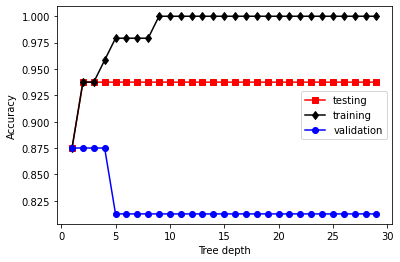

In [ ]:
run_hepatitis_tree_depth(cost_misclassification, "Misclassification")

Best Result for hepatitis dataset
	Cost Function: Gini Index
	Tree Depth: 29
	Accuracy: 93.8%


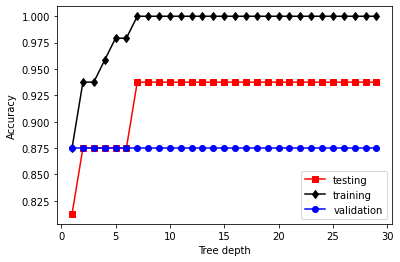

In [ ]:
run_hepatitis_tree_depth(cost_gini_index, "Gini Index")

Best Result for hepatitis dataset
	Cost Function: Entropy
	Tree Depth: 29
	Accuracy: 93.8%


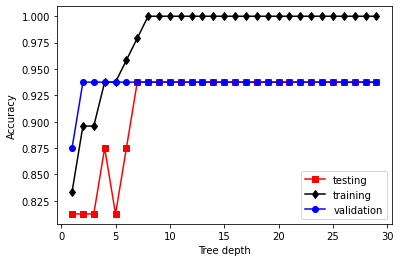

In [ ]:
run_hepatitis_tree_depth(cost_entropy, "Entropy")

In [ ]:
def run_diabetes_tree_depth(cost_fun, cost_string):


    # Required function to evaluate accuracy of model
    def evaluate_acc(y_pred, y_actual):
        return np.sum(y_pred == y_actual)/y_test.shape[0]

    model2_choices=[]
    valid2_acc = []
    train2_acc = []
    test2_acc = []

    n2_train = y2_train.shape[0]
    n2_valid = y2_val.shape[0]

    for depth in range(1,50, 1):
        tree = DecisionTree(max_depth=depth, cost_fn = cost_fun)

        probs2_test = tree.fit(X2_train, y2_train).predict(X2_train)
        y2_pred = np.argmax(probs2_test,1)
        train2_accuracy = np.sum(y2_pred == y2_train)/y2_train.shape[0]

        probs2_test = tree.fit(X2_train, y2_train).predict(X2_val)
        y2_pred = np.argmax(probs2_test,1)
        val2_accuracy = np.sum(y2_pred == y2_val)/y2_val.shape[0]

        probs2_test = tree.fit(X2_train, y2_train).predict(X2_test)
        y2_pred = np.argmax(probs2_test,1)
        test2_accuracy = np.sum(y2_pred == y2_test)/y2_test.shape[0]

        model2_choices.append(depth)
        valid2_acc.append(val2_accuracy)
        train2_acc.append(train2_accuracy)
        test2_acc.append(test2_accuracy)


    # use the best depth to predict test data

    # valid2_acc.reverse()
    # best2_accuracy_index = len(valid2_acc) - valid2_acc.index(max(valid2_acc)) - 1 # get last occurrence of best depth accuracy on validation data
    # valid2_acc.reverse()
    best2_accuracy_index = valid2_acc.index(max(valid2_acc))
    best2_valid_depth = model2_choices[best2_accuracy_index]
    tree = DecisionTree(max_depth=best2_valid_depth, cost_fn = cost_fun)
    probs2_test = tree.fit(X2_train, y2_train).predict(X2_test)
    y2_pred = np.argmax(probs2_test,1)
    accuracy = np.sum(y2_pred == y2_test)/y2_test.shape[0]

    plt.plot(model2_choices, test2_acc, marker='s', color='red', label='testing')
    plt.plot(model2_choices, train2_acc, marker='d', color='black', label='training')
    plt.plot(model2_choices, valid2_acc, marker='o', color='blue', label='validation')
    plt.xlabel("Tree depth")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.savefig('diabetes_DT_chooseDepth.png',dpi=300,bbox_inches='tight')


    print(f'Best Result for {dataset_name_2}\n\tCost Function: {cost_string}\n\tTree Depth: {best2_valid_depth}\n\tAccuracy: {accuracy*100:.1f}%')


Best Result for diabetic retinopathy dataset
	Cost Function: Misclassification
	Tree Depth: 27
	Accuracy: 67.8%


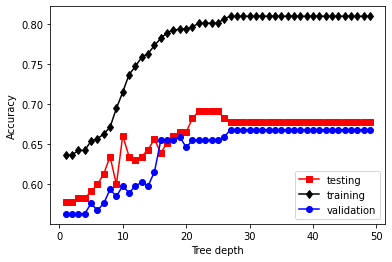

In [ ]:
run_diabetes_tree_depth(cost_misclassification, "Misclassification")

Best Result for diabetic retinopathy dataset
	Cost Function: Entropy
	Tree Depth: 22
	Accuracy: 67.0%


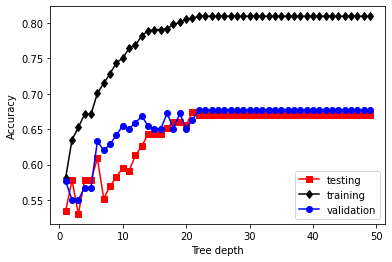

In [ ]:
run_diabetes_tree_depth(cost_entropy, "Entropy")

Best Result for diabetic retinopathy dataset
	Cost Function: Gini Index
	Tree Depth: 18
	Accuracy: 67.4%


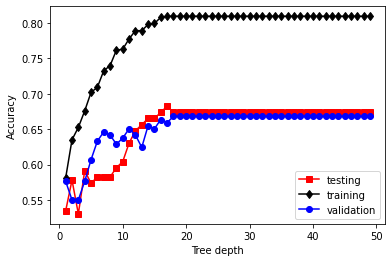

In [ ]:
run_diabetes_tree_depth(cost_gini_index, "Gini Index")

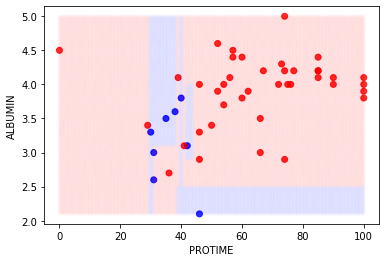

In [97]:
x0v1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 200)
x1v1 = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 200)
x01,x11 = np.meshgrid(x0v1, x1v1)
x1_all = np.vstack((x01.ravel(),x11.ravel())).T
for tree_depth in [29]:#:
    model = DecisionTree(max_depth=tree_depth)
    y_train_prob = np.zeros((y_train.shape[0],num_classes.astype(int)))
    y_prob_all = model.fit(X_train, y_train).predict(x1_all)
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
    y_prob_all = model.fit(X_train, y_train).predict(x1_all)
    aas=pd.DataFrame(y_train_prob)
    aps=pd.DataFrame(y_prob_all)
    ci = ['r' if yy==0 else 'b' for yy in aas[0]]
    cp=['r' if yy==0 else 'b' for yy in aps[0]]
    plt.scatter(X_train[:,0], X_train[:,1], c=ci ,marker='o', alpha=0.8)
    plt.scatter(x1_all[:,0], x1_all[:,1], c=cp, marker='.',alpha=.01)
    plt.ylabel( "ALBUMIN")
    plt.xlabel("PROTIME")
    # plt.title('Depth = ' + str(tree_depth))
    plt.savefig('hepatitis' + str(tree_depth) + '.png', bbox_inches="tight", dpi=300)

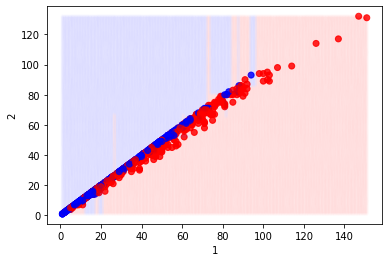

In [98]:

x0v = np.linspace(np.min(X2[:,0]), np.max(X2[:,0]), 200)
x1v = np.linspace(np.min(X2[:,1]), np.max(X2[:,1]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x2_all = np.vstack((x0.ravel(),x1.ravel())).T
for tree_depth in [27]:#:
    model = DecisionTree(max_depth=tree_depth)
    y2_train_prob = np.zeros((y2_train.shape[0],num_classes.astype(int)))
    y2_prob_all = model.fit(X2_train, y2_train).predict(x2_all)
    y2_train_prob[np.arange(y2_train.shape[0]), y2_train] = 1
    y2_prob_all = model.fit(X2_train, y2_train).predict(x2_all)
    aas=pd.DataFrame(y2_train_prob)
    aps=pd.DataFrame(y2_prob_all)
    ci = ['r' if yy==0 else 'b' for yy in aas[0]]
    cp=['r' if yy==0 else 'b' for yy in aps[0]]
    plt.scatter(X2_train[:,0], X2_train[:,1], c=ci ,marker='o', alpha=0.8)
    plt.scatter(x2_all[:,0], x2_all[:,1], c=cp, marker='.',alpha=.01)
    plt.ylabel('2')
    plt.xlabel('1')
    # plt.title('Depth = ' + str(tree_depth))
    plt.savefig('diabetes' + str(tree_depth) + '.png', bbox_inches="tight", dpi=300)